In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mouse_viral_study.csv")

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


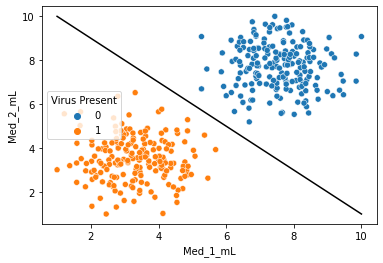

In [5]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue='Virus Present', data=df)

x=np.linspace(1,10,100)
m=-1
b=11
y=m*x+b
plt.plot(x,y,'black')

# Both med1 and med2 above 5 -> Virus - 0
# We're able to clearly see 2 different classes - not much overlap
# Let's find out line of best fit

In [6]:
X = df.drop('Virus Present', axis=1)
y=df['Virus Present']

In [7]:
from sklearn.svm import SVC

In [8]:
model = SVC(kernel='linear', C=1000)

In [9]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [10]:
from svm_margin_plot import plot_svm_boundary    # Custom function created

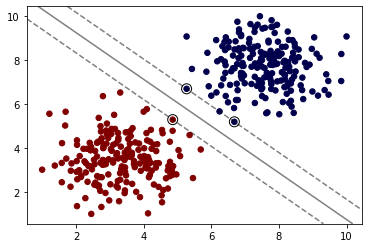

In [15]:
plot_svm_boundary(model, X, y)

In [11]:
model = SVC(kernel='linear', C=0.05)

In [12]:
model.fit(X,y)

SVC(C=0.05, kernel='linear')

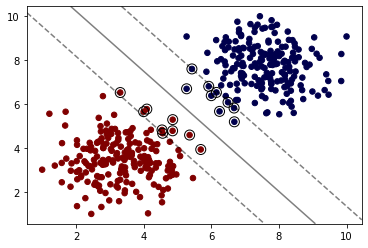

In [13]:
plot_svm_boundary(model, X, y)

In [14]:
# C is inversely proportioanl to the number of points allowed in soft margins

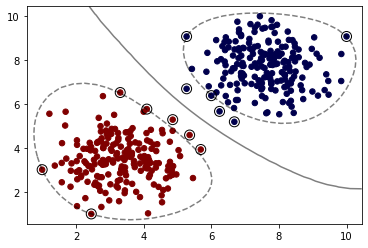

In [15]:
model = SVC(kernel='rbf', C=1)
model.fit(X,y)
plot_svm_boundary(model, X, y)

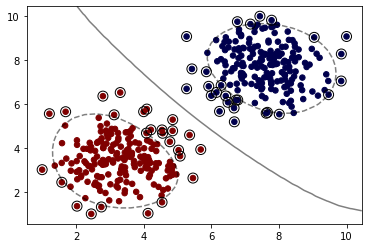

In [16]:
model = SVC(kernel='rbf', C=0.1)
model.fit(X,y)
plot_svm_boundary(model, X, y)

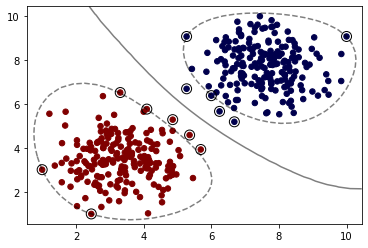

In [17]:
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X,y)
plot_svm_boundary(model, X, y)

# Gamma decides how much the surrounding support vectors affect the margin

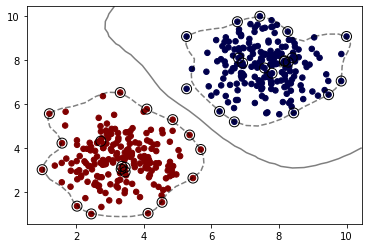

In [18]:
model = SVC(kernel='rbf', C=1, gamma='auto')   # Overfitting
model.fit(X,y)
plot_svm_boundary(model, X, y)

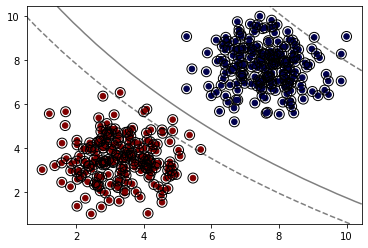

In [19]:
model = SVC(kernel='sigmoid')
model.fit(X,y)
plot_svm_boundary(model, X, y)


# Focuses on points at the center of the dataset to decide the margins
# Does not work for this dataset

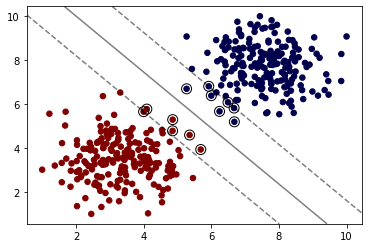

In [21]:
model = SVC(kernel='poly', C=1, degree=1)
model.fit(X,y)
plot_svm_boundary(model, X, y)

# Degree 1 - Linear kernel

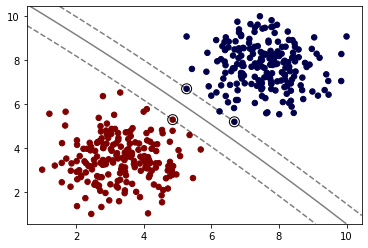

In [23]:
model = SVC(kernel='poly', C=1, degree=3)
model.fit(X,y)
plot_svm_boundary(model, X, y)

# Slightly curved

In [24]:
from sklearn.model_selection import GridSearchCV

In [28]:
svm = SVC()
param_grid={'C':[0.01,0.1,1], 'kernel':['linear', 'rbf']}

In [29]:
grid=GridSearchCV(svm, param_grid)

In [30]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [31]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}